# Example: CitiBike data

Adapted from Kelsey Jordahl
https://gist.github.com/kjordahl/5957573

In [3]:
import requests  
import json
from pyproj import Proj
from shapely.geometry import Point
import geopandas as gp

NYC borough boundaries downloaded from [Bytes of the Big Apple](http://www.nyc.gov/html/dcp/download/bytes/nybb_13a.zip)

In [4]:
boros = gp.GeoDataFrame.from_file('nybb_15b/nybb.shp')

Load real time bike station data from [CitiBike](http://citibikenyc.com) json API:

In [5]:
# get the bike data and convert it to a ditcionary
endpoint_url = 'http://citibikenyc.com/stations/json'
response = requests.get(endpoint_url)
data = json.loads(response.text)


In [6]:
data

{'executionTime': '2019-02-19 12:11:55 PM',
 'stationBeanList': [{'id': 304,
   'stationName': 'Broadway & Battery Pl',
   'availableDocks': 4,
   'totalDocks': 33,
   'latitude': 40.70463334,
   'longitude': -74.01361706,
   'statusValue': 'In Service',
   'statusKey': 1,
   'availableBikes': 28,
   'stAddress1': 'Broadway & Battery Pl',
   'stAddress2': '',
   'city': '',
   'postalCode': '',
   'location': '',
   'altitude': '',
   'testStation': False,
   'lastCommunicationTime': '2019-02-19 12:08:28 PM',
   'landMark': ''},
  {'id': 359,
   'stationName': 'E 47 St & Park Ave',
   'availableDocks': 33,
   'totalDocks': 64,
   'latitude': 40.75510267,
   'longitude': -73.97498696,
   'statusValue': 'In Service',
   'statusKey': 1,
   'availableBikes': 27,
   'stAddress1': 'E 47 St & Park Ave',
   'stAddress2': '',
   'city': '',
   'postalCode': '',
   'location': '',
   'altitude': '',
   'testStation': False,
   'lastCommunicationTime': '2019-02-19 12:11:54 PM',
   'landMark': ''}

In [6]:
# convert the relevant part to a geodataframe
df = gp.GeoDataFrame(data['stationBeanList'])
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,25,6,,304,,2019-02-19 12:51:32 PM,40.704633,,-74.013617,,Broadway & Battery Pl,,Broadway & Battery Pl,1,In Service,False,33
1,,27,33,,359,,2019-02-19 12:53:40 PM,40.755103,,-73.974987,,E 47 St & Park Ave,,E 47 St & Park Ave,1,In Service,False,64
2,,12,33,,377,,2019-02-19 12:53:06 PM,40.722438,,-74.005664,,6 Ave & Canal St,,6 Ave & Canal St,1,In Service,False,45
3,,5,31,,402,,2019-02-19 12:52:34 PM,40.740343,,-73.989551,,Broadway & E 22 St,,Broadway & E 22 St,1,In Service,False,39
4,,35,6,,520,,2019-02-19 12:51:30 PM,40.759923,,-73.976485,,W 52 St & 5 Ave,,W 52 St & 5 Ave,1,In Service,False,41


In [8]:
# there is one row for each bike station.  How many stations are there? 
len(df)

814

In [7]:
# in the file above, there are lon-lats, but no geometry field
# we need to set that up

s = gp.GeoSeries([Point(x, y) for x, y in zip(df['longitude'], df['latitude'])])
df['geometry'] = s
df.crs = {'init': 'epsg:4326', 'no_defs': True}
df.geometry.total_bounds

array([-74.0836394 ,  40.65539977, -73.9077436 ,  40.81439444])

In [10]:
# make sure they are on the same CRS.  
# checking the bounds is a nice way of seeing this
df.to_crs(boros.crs, inplace=True)
df.geometry.total_bounds

array([ 961064.73659426,  178056.37414829, 1009803.53178432,
        235986.42166716])

In [8]:
# the geometry objects can do lots of cool stuff.  For example: 

manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

0 stations in Manhattan


# Your turn

You can read about the range of operations available in geopandas here: 
    
http://geopandas.org/index.html

Your assignment is to: 

1. Calculate how many stations are in each borough
2. Calculate how many bikes are currently available in each borough
3. Read about and try at least two new spatial or geometric operations (beyond what I've covered here). 

In [ ]:
# Question 1: How many Stations in each borough. 

In [9]:
boros

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330466.075042,1.623827e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,3,Brooklyn,741185.900596,1.937597e+09,(POLYGON ((1021176.479003906 151374.7969970703...
2,4,Queens,897040.298576,3.045168e+09,(POLYGON ((1029606.076599121 156073.8142089844...
3,1,Manhattan,358408.460709,6.364467e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464400.198868,1.186973e+09,(POLYGON ((1012821.805786133 229228.2645874023...


In [13]:
manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

414 stations in Manhattan


In [14]:
Bronx = boros.geometry[4]
in_mn = df.geometry.within(Bronx)
print(sum(in_mn), 'stations in Bronx')

0 stations in Bronx


In [16]:
Queens = boros.geometry[2]
in_mn = df.geometry.within(Queens)
print(sum(in_mn), 'stations in Queens')

82 stations in Queens


In [17]:
Brooklyn = boros.geometry[1]
in_mn = df.geometry.within(Brooklyn)
print(sum(in_mn), 'stations in Brooklyn')

268 stations in Brooklyn


In [18]:
StatenIsland= boros.geometry[0]
in_mn = df.geometry.within(StatenIsland)
print(sum(in_mn), 'stations in StatenIsland')

0 stations in StatenIsland


In [ ]:
# len(citinikes_boros[citibikes_boros.BoroName.isna()])
#should return the 50 missing bikes.

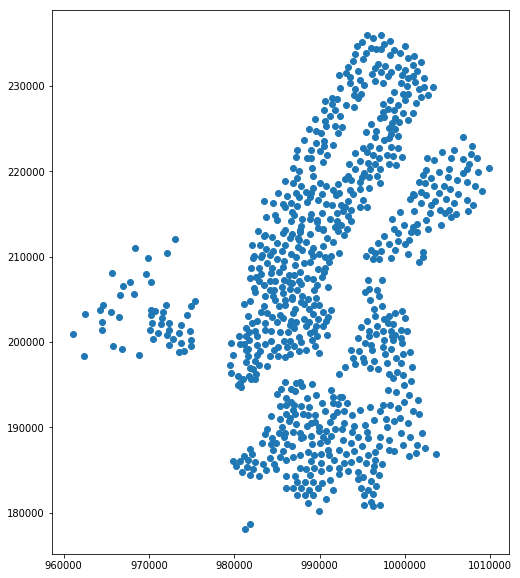

In [32]:
p = df.plot(figsize=(10,10))

In [ ]:
# Question Number 2 Calculate number of bikes in each borough

In [19]:
df

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks,geometry
0,,28,4,,304,,2019-02-19 12:08:28 PM,40.704633,,-74.013617,,Broadway & Battery Pl,,Broadway & Battery Pl,1,In Service,False,33,POINT (980474.5127561709 195993.6964498408)
1,,27,33,,359,,2019-02-19 12:11:54 PM,40.755103,,-73.974987,,E 47 St & Park Ave,,E 47 St & Park Ave,1,In Service,False,64,POINT (991179.9038325883 214381.943780388)
2,,13,32,,377,,2019-02-19 12:08:53 PM,40.722438,,-74.005664,,6 Ave & Canal St,,6 Ave & Canal St,1,In Service,False,45,POINT (982679.8907825906 202480.2214391762)
3,,0,36,,402,,2019-02-19 12:10:23 PM,40.740343,,-73.989551,,Broadway & E 22 St,,Broadway & E 22 St,1,In Service,False,39,POINT (987145.5291465931 209003.7784183958)
4,,37,4,,520,,2019-02-19 12:11:44 PM,40.759923,,-73.976485,,W 52 St & 5 Ave,,W 52 St & 5 Ave,1,In Service,False,41,POINT (990764.3536682081 216137.8937087742)
5,,3,13,,3255,,2019-02-19 12:11:12 PM,40.750585,,-73.994685,,8 Ave & W 31 St,,8 Ave & W 31 St,1,In Service,False,19,POINT (985722.6805079071 212735.1920977242)
6,,14,26,,3443,,2019-02-19 12:08:08 PM,40.761330,,-73.979820,,W 52 St & 6 Ave,,W 52 St & 6 Ave,1,In Service,False,41,POINT (989840.3759118057 216650.3564584734)
7,,4,48,,72,,2019-02-19 12:10:28 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,55,POINT (985931.7065028953 218814.7571059955)
8,,25,6,,79,,2019-02-19 12:11:43 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33,POINT (982402.0068864139 201269.7703469796)
9,,25,1,,82,,2019-02-19 12:10:45 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27,POINT (984204.1315763213 198376.4207269395)


In [20]:
df.availableBikes

0      28
1      27
2      13
3       0
4      37
5       3
6      14
7       4
8      25
9      25
10     35
11      5
12     13
13     30
14     26
15     22
16     13
17     18
18      0
19     28
20      4
21     35
22     28
23      2
24     42
25     41
26      3
27     14
28     26
29      8
       ..
784    30
785    38
786    23
787     6
788    35
789     0
790    11
791    25
792     4
793     1
794     1
795    26
796    11
797    49
798    24
799    37
800     2
801     2
802     6
803    24
804     0
805     6
806    21
807     2
808    14
809     7
810     1
811     5
812     8
813     6
Name: availableBikes, Length: 814, dtype: int64

In [21]:
bikes_bx = 0
for row in range(0,len(df)):
    if df['geometry'][row].within(boros.geometry[4])==True:
        bikes_bx = bikes_bx + df['availableBikes'][row]

In [22]:
bikes_Q = 0
for row in range(0,len(df)):
    if df['geometry'][row].within(boros.geometry[2])==True:
        bikes_Q = bikes_Q + df['availableBikes'][row]

In [23]:
bikes_bk = 0
for row in range(0,len(df)):
    if df['geometry'][row].within(boros.geometry[1])==True:
        bikes_bk = bikes_bk + df['availableBikes'][row]

In [24]:
bikes_si = 0
for row in range(0,len(df)):
    if df['geometry'][row].within(boros.geometry[0])==True:
        bikes_si = bikes_si + df['availableBikes'][row]

In [25]:
bikes_mn = 0
for row in range(0,len(df)):
    if df['geometry'][row].within(boros.geometry[3])==True:
        bikes_mn = bikes_mn + df['availableBikes'][row]

In [26]:
print ('available bikes in Manhattan', bikes_mn)
print ('available bikes in Staten Island', bikes_si)
print ('available bikes in Brooklyn', bikes_bk)
print ('available bikes in Queens', bikes_Q)
print ('available bikes in Bronx', bikes_bx)

available bikes in Manhattan 6407
available bikes in Staten Island 0
available bikes in Brooklyn 3334
available bikes in Queens 412
available bikes in Bronx 0


In [ ]:
# question 3

In [11]:
temp= boros.BoroName.to_frame()
for index, row in boros.iterrows():
    temp[row.BoroName]= boros.geometry.touches(row.geometry)
    

In [12]:
temp


,BoroName,Staten Island,Brooklyn,Queens,Manhattan,Bronx
0,Staten Island,False,False,False,False,False
1,Brooklyn,False,False,True,True,False
2,Queens,False,True,False,True,True
3,Manhattan,False,True,True,False,True
4,Bronx,False,False,True,True,False
